<a href="https://colab.research.google.com/github/yunariver/newproject/blob/main/11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

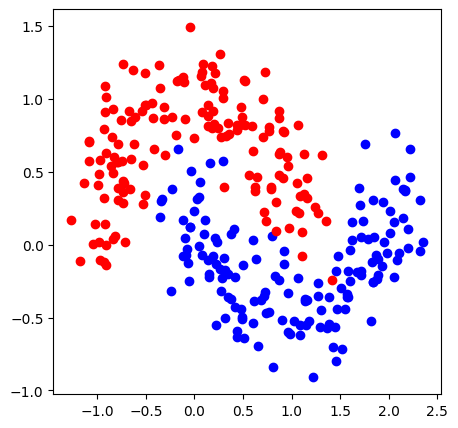

In [132]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader

N_SAMPLES = 300
BATCH_SIZE = 4
fig, ax = plt.subplots(figsize=(5,5))
X, y = make_moons(n_samples = N_SAMPLES, noise=0.2)

X_pos, X_neg = X[y == 1], X[y == 0]
ax.scatter(X_pos[:, 0], X_pos[:, 1], color='blue')
ax.scatter(X_neg[:, 0], X_neg[:, 1], color='red')
# x.shape (100,2)
# print(X[y==1])
# print(x[y==0])
dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
data_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE )



In [133]:
import torch.nn as nn
class SimpleModel(nn.Module):
  def __init__(self):
    super(SimpleModel, self).__init__()

    self.fc1 = nn.Linear(in_features=2, out_features=10)
    #x의 input(32,10)과 in_features(10)  같아야함. 따라서 (100,2)인 x의 in_feature은 2
    self.fc1_act = nn.Sigmoid()

    self.fc2 = nn.Linear(in_features=10, out_features=5)
    self.fc2_act = nn.Sigmoid()

    self.fc3 = nn.Linear(in_features=5, out_features=2)
    self.fc3_act = nn.Sigmoid()
    self.fc4 = nn.Linear(in_features=2, out_features=1)  #최종 out_feature가 모델의 pred깂(input)으로, target size와 같아야함.
    self.fc4_act = nn.Sigmoid()
    #make_moons로 만들어지는 dataset은 직선으로 나눌 수 없음 → 여러 레이어들을 이용하여 모델을 만들어야 함


  def forward(self, x):
    x = self.fc1(x)
    x - self.fc1_act(x)

    x = self.fc2(x)
    x - self.fc2_act(x)

    x = self.fc3(x)
    x - self.fc3_act(x)
    x = self.fc4(x)
    x - self.fc4_act(x)

    x = x.view(-1)

    return x




In [134]:
from torch.optim import SGD

LR = 0.1
if torch.cuda.is_available(): DEVICE = 'cuda'
elif torch.backends.mps.is_available(): DEIVCE = 'mps'
else : DEVICE = 'cpu'

model = SimpleModel().to(DEVICE)
loss_function =  nn.BCEWithLogitsLoss() #output이 0~1 사이의 값일 필요가 없다.
optimizer = SGD(model.parameters(), lr = LR)

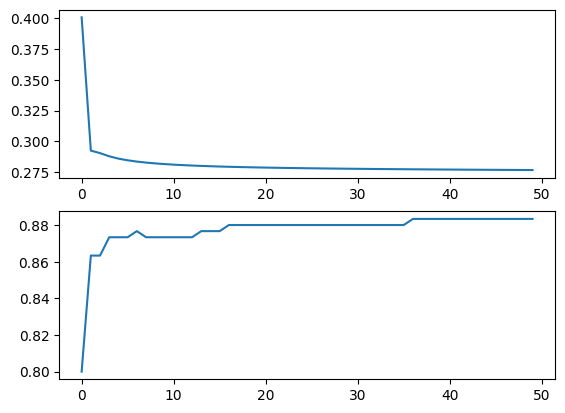

In [135]:
EPOCHS = 50
losses, accs = [], []
for epoch in range(EPOCHS):
  epoch_loss, n_corrects = 0., 0
  for X, y in data_loader:
    X, y = X.to(DEVICE), y.to(DEVICE)

    pred = model(X)
    loss = loss_function(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item() * len(X)
    pred = (pred > 0.5).type(torch.float)
    n_corrects += (pred == y).sum().item()

  epoch_loss /= N_SAMPLES
  losses.append(epoch_loss)
  epoch_acc = n_corrects / N_SAMPLES
  accs.append(epoch_acc)

  # print(f"EPOCH: {epoch+1}")
  # print(f"Loss: {epoch_loss :.4f} -ACC : {epoch_acc :.4f}\n")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)
axes[0].plot(losses)
axes[0].set_ylabel("BCELoss")
axes[1].plot(accs)
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("EPOCH")

In [ ]:
from